<a href="https://colab.research.google.com/github/vivianOge/gitlab2/blob/main/TEST_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt
import seaborn as sns


!pip install scikit-plot
import scikitplot as skplt
!pip install dmba
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart


In [ ]:
Housing_df = pd.read_csv('BostonHousing.csv')

In [ ]:
Housing_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [ ]:
Housing_df.columns = Housing_df.columns.str.replace('. ','_')

In [ ]:
Housing_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT_MEDV'],
      dtype='object')

In [ ]:
Housing_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9,0


In [ ]:
Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    int64  
 10  PTRATIO   506 non-null    float64
 11  LSTAT     506 non-null    float64
 12  MEDV      506 non-null    float64
 13  CAT_MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [ ]:
Housing_df.shape

(506, 14)

**a. Why should the data be partitioned into training and validation sets? What will the training set be used for? What will the validation set be used for?**

Answer: We partition our data into training and validation sets because we want to build a model for prediction, and to do that, we need to set aside some dataset to train our model and then, the remaining dataset to test out our model.

The training set will be used to train our model and the validation set(hold out dataset) we be used to test the validity of our model or how well the model we built performed.

 **b. Fit a multiple linear regression model to the median house price (MEDV) as a function of CRIM, CHAS, and RM. Write the equation for predicting the
median house price from the predictors in the model.** 

In [ ]:
predictors = ['CRIM','CHAS','RM']
outcome = 'MEDV'

In [ ]:
X = Housing_df[predictors]

In [ ]:
Y = Housing_df[outcome]

In [ ]:
# Now I split my train and validation data, with my train data as 70% of the combined data from CRIM CHAS RM AND MEDV

train_X,valid_X,train_Y,valid_Y = train_test_split(X,Y, train_size=0.3, random_state=None)

In [ ]:
print(train_X.shape)
print(valid_X.shape)

(151, 3)
(355, 3)


In [ ]:
Housing_lm = LinearRegression()

In [ ]:
Housing_lm.fit(train_X,train_Y)

LinearRegression()

In [ ]:
pred_Y = Housing_lm.predict(train_X)
pred_Y

array([20.84918798, 23.82374709, 20.60339355, 25.77688218, 25.93165987,
       23.21143286, 16.50460712, 22.41981183, 16.23567626, 11.31177869,
       44.11493567, 15.67768169, 27.7995093 , 24.22015982, 21.04945802,
       20.36814991, 21.71761215, 20.37742413,  3.77963323, 16.98709474,
       21.08726095, 15.88481612, 16.85027082, 11.29904305, 18.28940217,
       20.15356751, 13.35361683, 25.89505994, 22.96046911, 24.15165044,
       22.51685728, 40.53852603, 28.30207487, 26.03966129, 11.39730741,
       30.74795915, 10.91664506, 28.94525654, 31.73897733, 24.03415253,
       22.00707549, 13.21557688, 25.37877663, 17.83228148, 18.3930555 ,
       24.30050497, 26.00683994, 21.95406951, 10.53612086, 20.8324421 ,
       44.35300869, 21.66785555, 17.4888177 , 31.61932543, 14.401284  ,
       21.82663954, 14.79825777, 16.29406121, 18.94352361, 19.41769953,
       30.34158865, 22.05060724, 19.54877472, 29.76241404, 26.14213096,
       19.9649793 , 23.96885979, 20.09572547, 21.6377616 ,  9.84

In [ ]:
pred_Y2 = Housing_lm.predict(valid_X)
pred_Y2

array([ 29.46131338,  34.81213478,  16.53140289,  39.16444199,
        16.74523926,  28.87746493,  -8.70832619,  19.23360895,
        46.77158898,  18.81900959,  32.28104478,  16.94294164,
        20.89914485,  30.35126271,  17.56920818,  22.63023274,
        15.97239105,  21.15180903,  35.48988285,  27.02006118,
        19.8840039 ,  23.51841791,  19.47881394,  16.94060589,
        20.21467848,  17.84365896,  18.10100231,  21.09763993,
        27.65342104,  21.989188  ,  40.89393142,  20.64744252,
        40.33256592,  19.40500271,  20.74127343,  26.0446695 ,
        27.58292296,  20.58762365,  21.7824036 ,  24.49200607,
        18.52729175,  -6.67673943,  33.06854775,  30.61934835,
        11.53857329,  31.55640451,  24.55837447,  15.22047152,
        24.21632901,  29.21344901,  20.06443372,  19.75538125,
        22.00254388,   1.80802225,  25.51034375,  19.71031548,
        23.065338  ,  27.63089562,  30.95395235,  17.13407062,
        16.69189702,  22.47214434,  20.27575057,  30.89

In [ ]:
regressionSummary(train_Y, pred_Y)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 4.8352
            Mean Absolute Error (MAE) : 3.4843
          Mean Percentage Error (MPE) : -5.7950
Mean Absolute Percentage Error (MAPE) : 20.8811


In [ ]:
regressionSummary(valid_Y, pred_Y2)


Regression statistics

                      Mean Error (ME) : 1.9979
       Root Mean Squared Error (RMSE) : 7.8272
            Mean Absolute Error (MAE) : 4.7125
          Mean Percentage Error (MPE) : 9.9569
Mean Absolute Percentage Error (MAPE) : 27.0184


In [ ]:
from dmba import adjusted_r2_score

In [ ]:
adjusted_r2_score(train_Y,pred_Y, Housing_lm)

0.6818239677982816

In [ ]:
adjusted_r2_score(valid_Y,pred_Y2, Housing_lm)

0.5014399844338895

In [ ]:
#To get the coefficient,Intercept, Slopes of CRIM CHAS & RM
print(Housing_lm.score(X,Y),
Housing_lm.intercept_,
Housing_lm.coef_)

0.40820030153924003 -32.43033740749452 [-0.62023814  3.76055789  8.83784163]


In [ ]:
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': Housing_lm.coef_})) # To convert it to a dataframe 

  Predictor  coefficient
0      CRIM    -0.620238
1      CHAS     3.760558
2        RM     8.837842


**Equation for predicting the median house price:**


**MEDV = -35.44 - 0.23*CRIM + 2.01*CHAS + 9.36*RM**

**c. Using the estimated regression model, what median house price is predicted
for a tract in the Boston area that does not bound the Charles River, has a
crime rate of 0.1, and where the average number of rooms per house is 6?**

In [ ]:
 MEDV = -35.44 - 0.23*(0.1) + 2.01*(0) + 9.36*(6) 
 print(MEDV)

20.696999999999996


**From the above, the estimated median house price predicted for the Boston area with the description above is 20.699.**

**d) Reduce the number of predictors:**


**i. Which predictors are likely to be measuring the same thing among the 13
predictors? Discuss the relationships among INDUS, NOX, and TAX.**


Apart from the predictors on themselves, the pairs: INDUS & DIS,INDUS & TAX, NOX & AGE, NOX & DIS, NOX & INDUS, AGE & DIS, RAD & TAX, LSTAT & MEDV,MEDV & CAT_MEDV are likely to be measuring the same thing because they are highly correlated.

INDUS,TAX and NOX have a positive correlation with each other, hence, they would give the same information because they are measuring the same thing. 




**ii. Compute the correlation table for the 12 numerical predictors and** **search for highly correlated pairs. These have potential redundancy and can**
**cause multicollinearity. Choose which ones to remove based on this table.**

In [ ]:
Housing_df.iloc[:,0:12].corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993


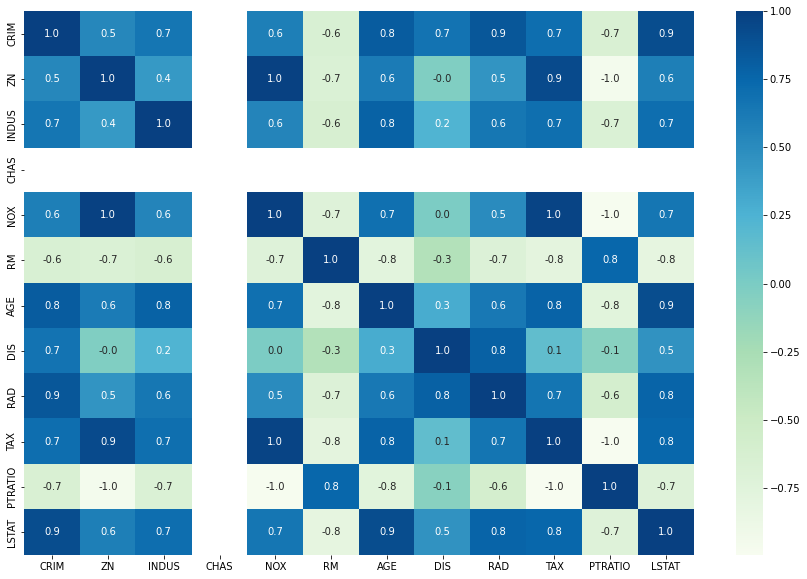

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
A= Housing_df.iloc[0:12,0:12].corr()
sns.heatmap(A, fmt='.1f', annot = True,cmap = 'GnBu')

From the table above,the pairs: INDUS & DIS,INDUS & TAX, NOX & AGE, NOX & DIS, NOX & INDUS, AGE & DIS, RAD & TAX, LSTAT & MEDV,MEDV & CAT_MEDV have high correlations and may cause redundancy of information, hence, i will remove NOX, INDUS and TAX to reduce multicollinearity.

**Optional (Not Graded) for Winter 2022**


**iii. Use two subset selection algorithms: backward and forward to reduce the remaining predictors. Compute the validation performance for both of the selected models. Compare RMSE, MAPE, and mean error, as well as histograms of the errors.** 


**Finally,describe the best model.**